In [ ]:
import numpy as np
from matplotlib import pylab as plt
from scipy import optimize


Задача 1. Минимизация гладкой функции
Рассмотрим все ту же функцию из задания по линейной алгебре: f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2), но теперь уже на промежутке [1, 30]

В первом задании будем искать минимум этой функции на заданном промежутке с помощью scipy.optimize. Разумеется, в дальнейшем вы будете использовать методы оптимизации для более сложных функций, а f(x) мы рассмотрим как удобный учебный пример.


Напишите на Питоне функцию, вычисляющую значение f(x) по известному x. Будьте внимательны: не забывайте про то, что по умолчанию в питоне целые числа делятся нацело, и о том, что функции sin и exp нужно импортировать из модуля math.

Я вместо math использую numpy.

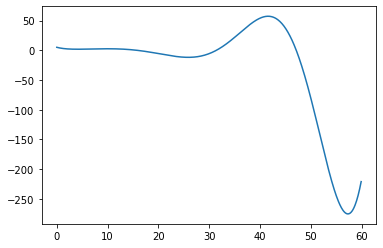

In [ ]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

xa = 0
xb = 60
x_plot = np.arange(xa, xb, 0.1)
y_plot = f(x_plot)

plt.plot(x_plot, y_plot)

Попробуйте найти минимум, используя стандартные параметры в функции  scipy.optimize.minimize (т.е. задав только функцию и начальное приближение). Попробуйте менять начальное приближение и изучить, меняется ли результат.

In [14]:
xa = 1
xb = 30

x0 = np.linspace(xa, xb, 10)
f_min = [optimize.minimize(f, x0i) for x0i in x0]
x_sol = np.array([f.x[0] for f in f_min])

pd.DataFrame(list(zip(x0, x_sol, f(x_sol))), columns = ['x0', 'x_sol', 'f(x_sol)'])

,x0,x_sol,f(x_sol)
0,1.000000,4.136287,1.745268
1,4.222222,4.136299,1.745268
2,7.444444,4.136289,1.745268
3,10.666667,25.880202,-11.898895
4,13.888889,25.880194,-11.898895
5,17.111111,25.880178,-11.898895
6,20.333333,25.880193,-11.898895
7,23.555556,25.880193,-11.898895
8,26.777778,25.880195,-11.898895
9,30.000000,25.880193,-11.898895


In [15]:
f_min[4]

      fun: -11.898894665981166
 hess_inv: array([[1.68268107]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([25.88019376])

Укажите в scipy.optimize.minimize в качестве метода BFGS (один из самых точных в большинстве случаев градиентных методов оптимизации), запустите из начального приближения x=2. Градиент функции при этом указывать не нужно – он будет оценен численно. Полученное значение функции в точке минимума - ваш первый ответ по заданию 1, его надо записать с точностью до 2 знака после запятой.

Теперь измените начальное приближение на x=30. Значение функции в точке минимума - ваш второй ответ по заданию 1, его надо записать через пробел после первого, с точностью до 2 знака после запятой.

In [17]:
xa = 0
xb = 30
x0 = np.linspace(xa, xb, 10)

# Выберем BFGS метод вместо метода по-умолчнию
f_min = [optimize.minimize(f, x0i, method='BFGS') for x0i in x0]
x_sol = np.array([f.x[0] for f in f_min])

pd.DataFrame(list(zip(x0, x_sol, f(x_sol))), columns = ['x0', 'x_sol', 'f(x_sol)'])

,x0,x_sol,f(x_sol)
0,0.000000,4.136288,1.745268e+00
1,3.333333,4.136260,1.745268e+00
2,6.666667,4.136340,1.745268e+00
3,10.000000,4.136300,1.745268e+00
4,13.333333,182.959816,-7.895667e+07
5,16.666667,25.880193,-1.189889e+01
6,20.000000,25.880187,-1.189889e+01
7,23.333333,25.880193,-1.189889e+01
8,26.666667,25.880194,-1.189889e+01
9,30.000000,25.880193,-1.189889e+01


In [21]:
xa = 0
xb = 30

x0 = [2, 30]
x_sol = np.array([optimize.minimize(f, x0i, method='bfgs').x[0] for x0i in x0])

solution_str = np.round(f(x_sol), 2).astype(str)
output_str = ' '.join(solution_str)
print('output_str:', output_str)

file_obj = open('3_01_assignment_1.txt', 'w')
file_obj.write(output_str)
file_obj.close()

output_str: 1.75 -11.9


Стоит обдумать полученный результат. Почему ответ отличается в зависимости от начального приближения? Если нарисовать график функции (например, как это делалось в видео, где мы знакомились с Numpy, Scipy и Matplotlib), можно увидеть, в какие именно минимумы мы попали. В самом деле, градиентные методы обычно не решают задачу глобальной оптимизации, поэтому результаты работы ожидаемые и вполне корректные.

